# Random Forests
## & Decision Trees

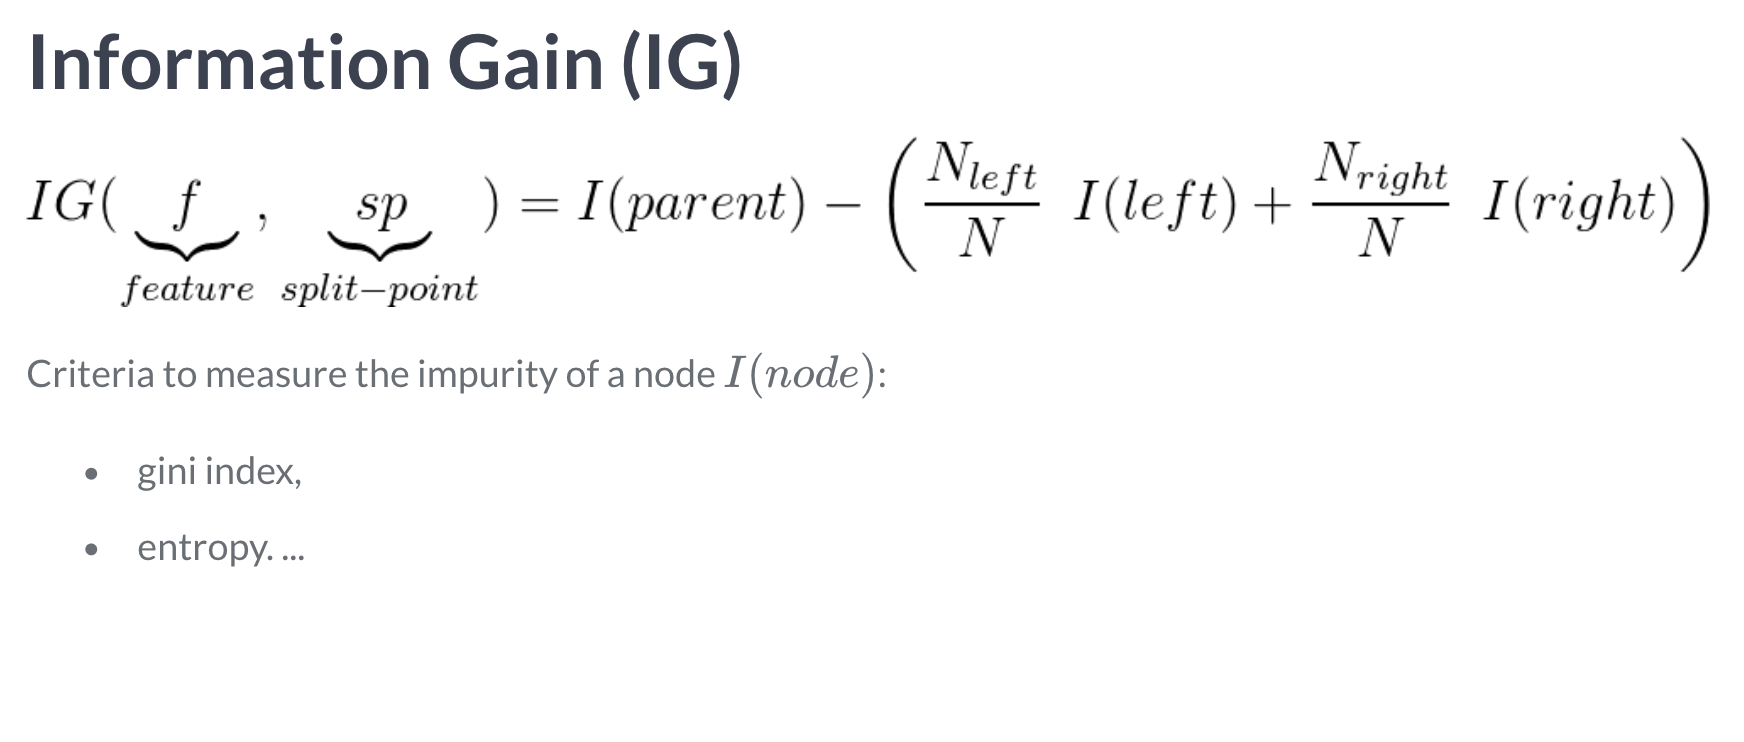

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

essays = pd.read_csv('../data/processed/essays_with_topic_scores.csv', index_col=0)

# Set the essay id as the index of the dataframe
essays.set_index('essay_id', inplace=True)

scores = essays['domain1_score']
length = essays['length']

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
X = essays.drop(['domain1_score'], axis=1)
y = essays['domain1_score']

# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [4]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

In [5]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred, y_test)
accuracy_entropy

0.5406162464985994

In [6]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_pred, y_test)
accuracy_gini

0.5434173669467787

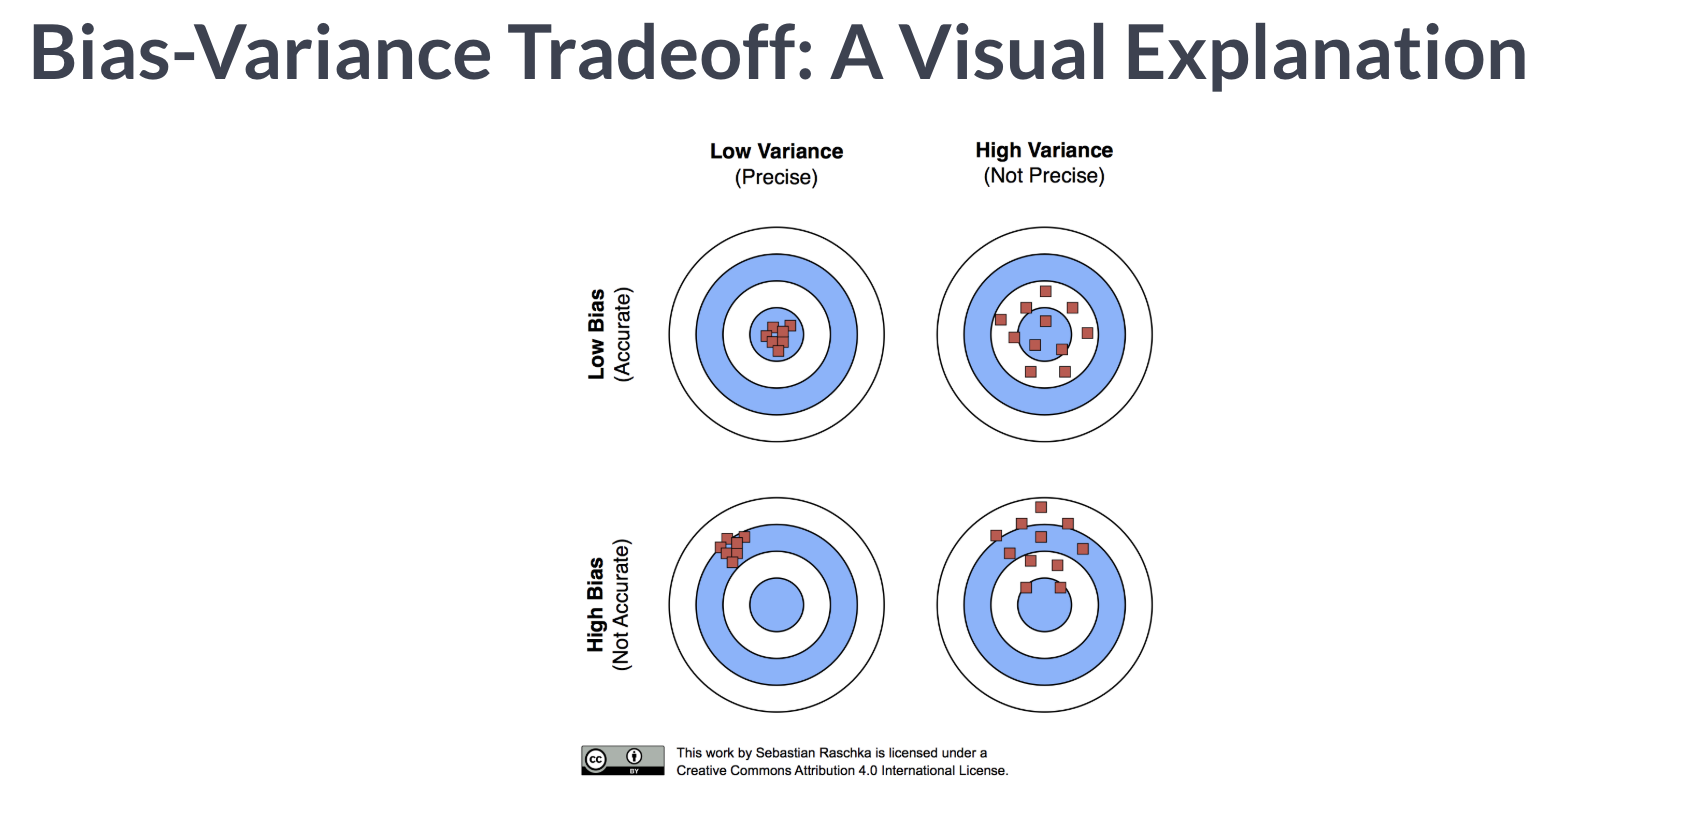

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=2)

# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Compute the array containing the 10-folds CV MSEs
Accuracy_CV_scores = cross_val_score(dt_gini, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1) 

Accuracy_CV_scores

# # Compute the 10-folds CV RMSE
# RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# # Print RMSE_CV
# print('CV RMSE: {:.2f}'.format(RMSE_CV))

array([0.52249135, 0.54006969, 0.48070175, 0.49647887, 0.54092527])

### Ensemble Learning

Voting classifier

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Set seed for reproducibility
SEED=3

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=5)

# Instantiate dt
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=SEED)


# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [10]:
# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.468
K Nearest Neighbours : 0.521
Classification Tree : 0.521


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [11]:
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.515


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Bagging Techniques

In [12]:
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Instantiate dt
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=0.016, random_state=4)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=12)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.54


#### Oug of Bag (OOB) instances used to evaluate model without use of CV

ob image

In [13]:
# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Instantiate dt
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=0.016, random_state=4)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1, random_state=13)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)

# Extract the OOB accuracy from bc
oob_accuracy = bc.oob_score_

print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

print('OOB accuracy of bc: {:.2f}'.format(oob_accuracy))

Test set accuracy of bc: 0.52
OOB accuracy of bc: 0.52
